<a href="https://colab.research.google.com/github/jacr2006/tensorflow/blob/master/linear_regression_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Regresion lineal con Tensorflow

El propósito de esta regresion lineal es predecir la emision de CO2 de vehiculos livianos observando la cilindrada.
Disponemos del dataset "Fuel consumption ratings" disponible en:
https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64

Descarga del dataset en formato .csv

In [206]:
!wget -O FuelConsumption.csv 'https://www.nrcan.gc.ca/sites/www.nrcan.gc.ca/files/oee/files/csv/Original_1995-1999_Fuel_Consumption_Ratings_(2-cycle).csv'

--2019-08-16 03:07:18--  https://www.nrcan.gc.ca/sites/www.nrcan.gc.ca/files/oee/files/csv/Original_1995-1999_Fuel_Consumption_Ratings_(2-cycle).csv
Resolving www.nrcan.gc.ca (www.nrcan.gc.ca)... 198.103.48.143
Connecting to www.nrcan.gc.ca (www.nrcan.gc.ca)|198.103.48.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 242704 (237K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>] 237.02K   900KB/s    in 0.3s    

2019-08-16 03:07:19 (900 KB/s) - ‘FuelConsumption.csv’ saved [242704/242704]



In [0]:
#!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

Importar las librerias necesarias

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

Lectura del .csv y asignacion a un dataframe para facilitar su visulizacion y manipulacion

In [0]:
df = pd.read_csv("FuelConsumption.csv", encoding='latin1')

Visualizacion de las primeras 10 filas del dataframe

In [210]:
df.head(10)

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 EMISSIONS
0,YEAR,NaN,# = high output engine,NaN,(L),NaN,NaN,TYPE,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),(g/km)
1,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,10.2,7.0,8.8,32,202
2,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,M5,X,9.6,7.0,8.4,34,193
3,1995,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4.0,M5,Z,9.4,7.0,8.3,34,191
4,1995,ACURA,LEGEND,COMPACT,3.2,6.0,A4,Z,12.6,8.9,10.9,26,251
5,1995,ACURA,LEGEND COUPE,COMPACT,3.2,6.0,A4,Z,13.0,9.3,11.3,25,260
6,1995,ACURA,LEGEND COUPE,COMPACT,3.2,6.0,M6,Z,13.4,8.4,11.2,25,258
7,1995,ACURA,NSX,TWO-SEATER,3.0,6.0,A4,Z,13.5,9.2,11.6,24,267
8,1995,ACURA,NSX,TWO-SEATER,3.0,6.0,M5,Z,12.9,9.0,11.1,25,255
9,1995,ALFA ROMEO,164 LS,COMPACT,3.0,6.0,A4,Z,15.7,10.0,13.1,22,301


Verificacion de la exitencia de datos nulos

In [211]:
df[['ENGINE SIZE']].isnull().sum()

ENGINE SIZE    21
dtype: int64

In [218]:
np.isnan(df['ENGINE SIZE'].iloc[5])

TypeError: ignored

In [213]:
for i in range(df[['ENGINE SIZE']].shape[0]):
  if ( np.isnan(df[['ENGINE SIZE']].iloc[i])==True):
    print("{}-{}".format(i, df['ENGINE SIZE'].iloc[i]))  

TypeError: ignored

In [214]:
df[['CO2 EMISSIONS ']].isnull().sum()

CO2 EMISSIONS     21
dtype: int64

In [215]:
for i in range(df[['CO2 EMISSIONS ']].shape[0]):
  if ( np.isnan(df['CO2 EMISSIONS '].iloc[i])==True):
    print("{}-{}".format(i, df['CO2 EMISSIONS '].iloc[i]))

TypeError: ignored

La visualización anterior muestra las variables observadas del dataset y sus valores numericos. Pero la fila 1 no es numérica y generará errores cuando se realizen operacion numéricas. Se debe omitir ( o saltar en la lectura del csv)

In [0]:
null_values = ["n/a", "nan", "--"]
df = pd.read_csv("FuelConsumption.csv", encoding='latin1', skiprows=[1], na_values = null_values)

Lectura y asignacion de las variables de interes que se usaran en la predicción

In [0]:
train_x = np.asanyarray(df[['ENGINE SIZE']])
train_y = np.asanyarray(df[['CO2 EMISSIONS ']])

Para una visulizacion grafica de los datos usamos matplolib

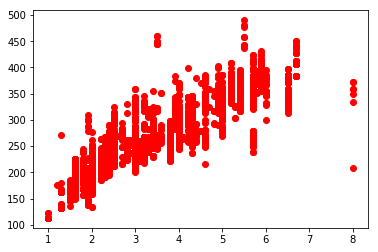

In [222]:
plt.plot(train_x, train_y, 'ro')
plt.show()

La hipotesis usada para la predicción será una ecuacion lineal. Se espera obtener la recta que mejor se ajuste. La funcion de costos medirá el error de la hipotesis

In [0]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)
y = a * train_x + b

La funcion de costos o perdida usada será la media de la diferencia entre el valor real y el inferido

In [0]:
loss = tf.reduce_mean(tf.square(y - train_y))

El algoritmo usado para hallar el minimo de la función de perdida será Gradiente Descendente con un coeficiente de aprendizaje de 0.05, en un principio

In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.05)

In [0]:
train = optimizer.minimize(loss)

Se crea una sesion y se inicializan las variables globales

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

Se ejecutan 200 iteraciones y se imprime el valor de la funcion de perdida

In [228]:
loss_values = []
train_data = []
for step in range(200):
    _, b_val, a_val, loss_val = sess.run([train, b, a, loss])
    loss_values.append(loss_val)
    if step % 5 == 0:
        print(step, loss_val, a_val, b_val)
        train_data.append([a_val, b_val])

0 nan 20.0 30.2
5 nan nan nan
10 nan nan nan
15 nan nan nan
20 nan nan nan
25 nan nan nan
30 nan nan nan
35 nan nan nan
40 nan nan nan
45 nan nan nan
50 nan nan nan
55 nan nan nan
60 nan nan nan
65 nan nan nan
70 nan nan nan
75 nan nan nan
80 nan nan nan
85 nan nan nan
90 nan nan nan
95 nan nan nan
100 nan nan nan
105 nan nan nan
110 nan nan nan
115 nan nan nan
120 nan nan nan
125 nan nan nan
130 nan nan nan
135 nan nan nan
140 nan nan nan
145 nan nan nan
150 nan nan nan
155 nan nan nan
160 nan nan nan
165 nan nan nan
170 nan nan nan
175 nan nan nan
180 nan nan nan
185 nan nan nan
190 nan nan nan
195 nan nan nan


In [0]:
plt.plot(loss_values, 'ro')

In [0]:
#sess.close()